# Exploratory Data analysis

About Dataset
Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

## Imports and settings

Import the libraries we'll use and set some display options for nicer outputs.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno


## Load dataset

We'll load the Telco Customer Churn CSV that is in the `data/` folder and show shape and the first rows.

In [10]:
import os
csv_path = os.path.join('data', 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = pd.read_csv(csv_path)

print("Dataset path:", csv_path)
print("Shape:", df.shape)

df.head()

Dataset path: data/WA_Fn-UseC_-Telco-Customer-Churn.csv
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick data inspection

Check dtypes, missing values, basic statistics and unique counts for categorical columns.

In [11]:
# Show info and describe
print('Info:')
df.info()

print('\nMissing values per column:')
print(df.isna().sum())

print('\nUnique values for object dtypes:')
for col in df.select_dtypes(include='object').columns:
    print(col, ':', df[col].nunique())

# Statistics for numeric columns
print('\nDescribe (numeric):')
print(df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   ob

## Clean TotalCharges and quick fixes

`TotalCharges` can sometimes be read as object because of spaces/empty strings. Convert to numeric and inspect rows with missing or problematic values.

In [12]:
# Convert TotalCharges to numeric, coerce errors and inspect
# Create a copy to be safe
df_clean = df.copy()

# Strip spaces
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)
# Convert
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

print('Missing TotalCharges after conversion:', df_clean['TotalCharges'].isna().sum())
# Show rows where TotalCharges is missing
if df_clean['TotalCharges'].isna().sum() > 0:
    display(df_clean[df_clean['TotalCharges'].isna()].head())

# Option: these customers often have tenure==0; we can fill with 0 or MonthlyCharges*tenure
print('\nValue counts of tenure==0 among TotalCharges NA:')
print((df_clean[df_clean['TotalCharges'].isna()]['tenure'] == 0).sum())

# If desired, fill NA TotalCharges with MonthlyCharges * tenure (safe fallback)
df_clean['TotalCharges_filled'] = df_clean['TotalCharges'].fillna(df_clean['MonthlyCharges'] * df_clean['tenure'])

print('\nDone conversion. Using `df_clean` going forward for EDA.')

Missing TotalCharges after conversion: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No



Value counts of tenure==0 among TotalCharges NA:
11

Done conversion. Using `df_clean` going forward for EDA.


## Churn distribution and numeric variable plots

Explore churn counts and distributions for tenure, MonthlyCharges, and TotalCharges_filled.

Churn
No     5174
Yes    1869
Name: count, dtype: int64


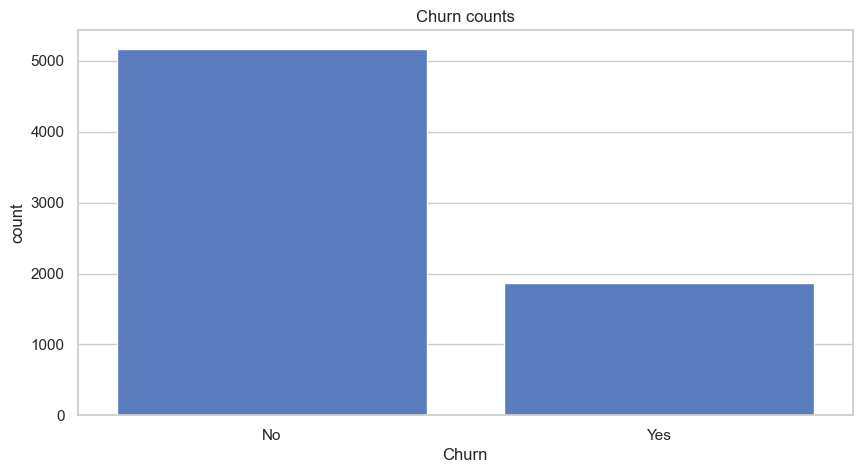

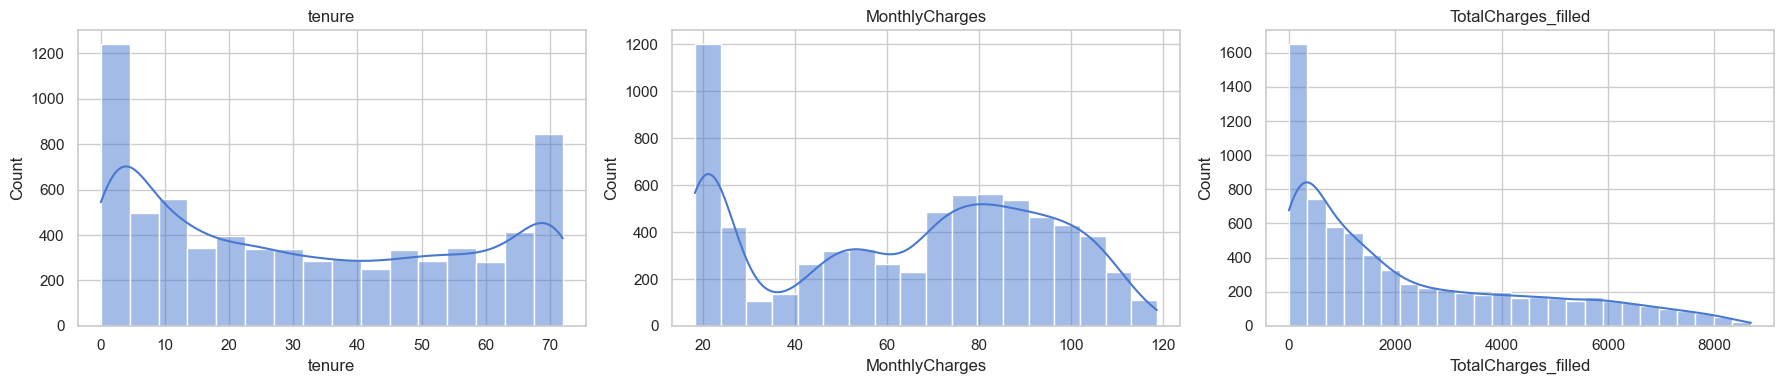

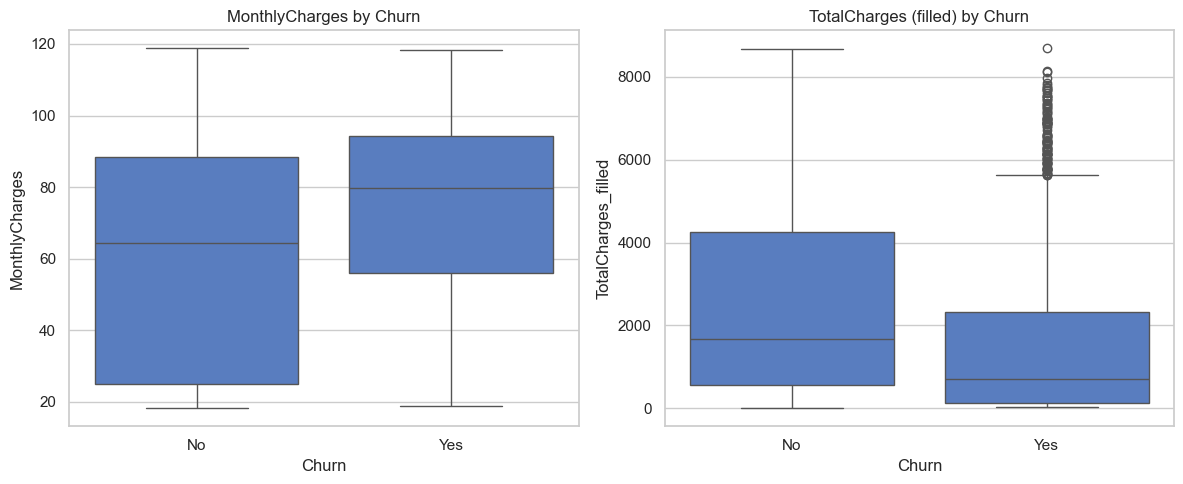

In [13]:
# Churn distribution
print(df_clean['Churn'].value_counts())
ax = sns.countplot(data=df_clean, x='Churn')
ax.set_title('Churn counts')

# Histograms for numeric variables
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges_filled']
fig, axes = plt.subplots(1, 3, figsize=(18,4))
for col, ax in zip(numeric_cols, axes):
    sns.histplot(df_clean[col].dropna(), kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()

# Boxplots by churn for MonthlyCharges and TotalCharges_filled
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean, ax=axes[0])
axes[0].set_title('MonthlyCharges by Churn')
sns.boxplot(x='Churn', y='TotalCharges_filled', data=df_clean, ax=axes[1])
axes[1].set_title('TotalCharges (filled) by Churn')
plt.tight_layout()

## Categorical counts (selected columns)

Plot counts for some important categorical variables: `Contract`, `PaymentMethod`, `InternetService`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`.

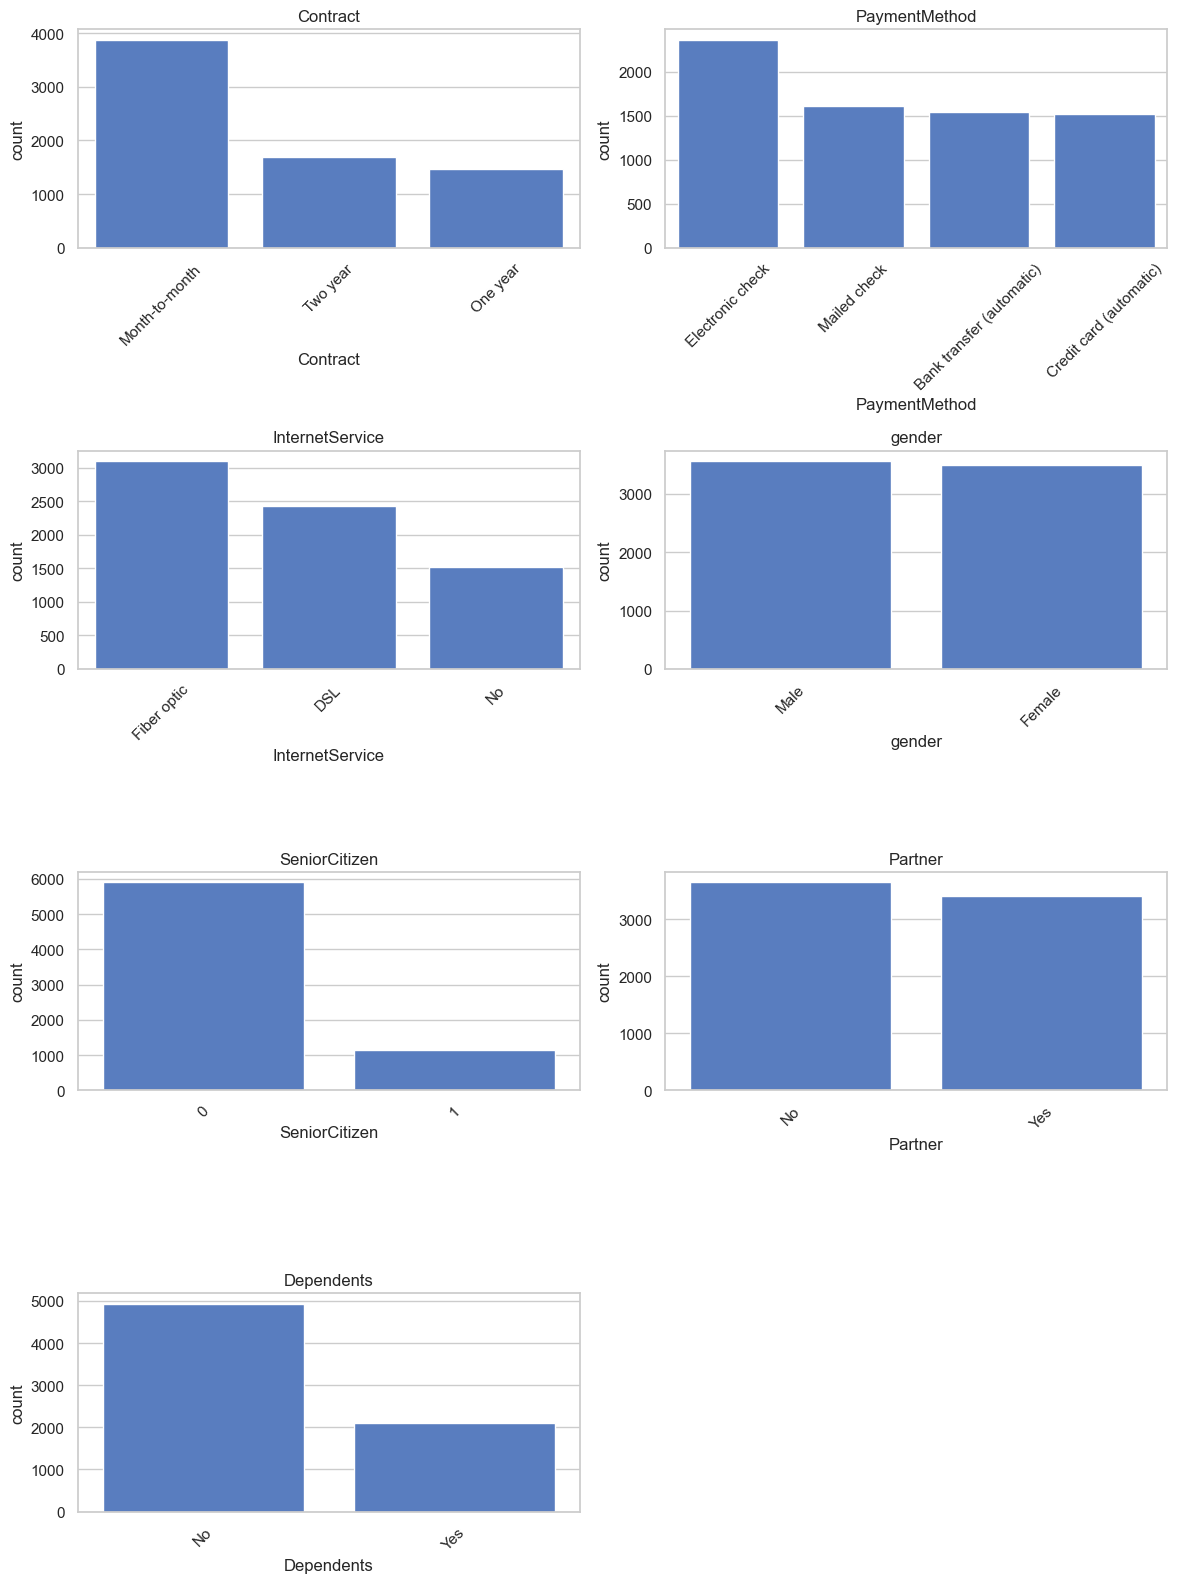

In [14]:
cat_cols = ['Contract','PaymentMethod','InternetService','gender','SeniorCitizen','Partner','Dependents']

ncols = 2
nrows = int(np.ceil(len(cat_cols)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
axes = axes.flatten()
for ax, col in zip(axes, cat_cols):
    order = df_clean[col].value_counts().index
    sns.countplot(data=df_clean, x=col, order=order, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# hide any unused axes
for ax in axes[len(cat_cols):]:
    ax.set_visible(False)
plt.tight_layout()


## Correlation heatmap (numeric features)

Show correlations between numeric features (tenure, MonthlyCharges, TotalCharges_filled).

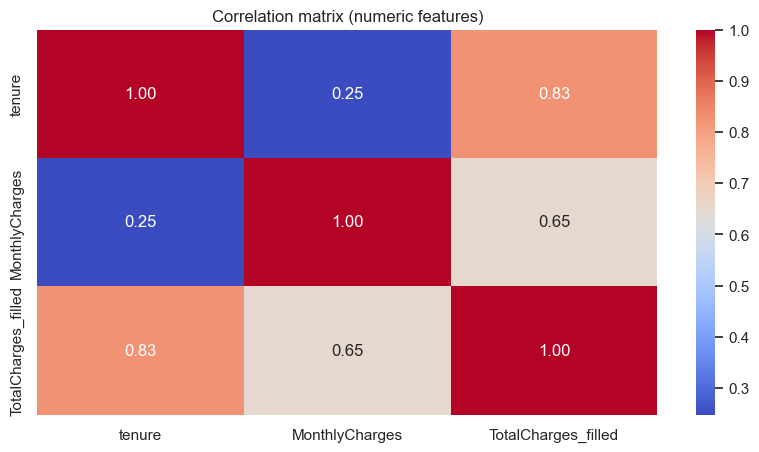

In [15]:
num_for_corr = ['tenure','MonthlyCharges','TotalCharges_filled']
corr = df_clean[num_for_corr].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix (numeric features)')
plt.show()